<a href="https://colab.research.google.com/github/Shruti-Raj-Vansh-Singh/fastai/blob/master/Image_Classification_application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastai==2.0.12

     |████████████████████████████████| 358kB 4.6MB/s 
     |████████████████████████████████| 40kB 5.6MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [2]:
from fastai import *
from fastai.vision.all import *
from fastai.data.all import *
from fastai.vision.widgets import *
import os
from PIL import Image

In [3]:
#check version of fastai
import fastai
fastai.__version__

'2.0.12'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!unzip '/content/drive/My Drive/dataset/IMAGES.zip'

Archive:  /content/drive/My Drive/dataset/IMAGES.zip
   creating: IMAGES/
  inflating: IMAGES/.DS_Store        
   creating: IMAGES/dogs/
  inflating: IMAGES/dogs/dog.1007.jpg  
  inflating: IMAGES/dogs/dog.1006.jpg  
  inflating: IMAGES/dogs/dog.1004.jpg  
  inflating: IMAGES/dogs/dog.1005.jpg  
  inflating: IMAGES/dogs/dog.1002.jpg  
  inflating: IMAGES/dogs/dog.1003.jpg  
  inflating: IMAGES/dogs/dog.1001.jpg  
  inflating: IMAGES/dogs/dog.100.jpg  
  inflating: IMAGES/dogs/dog.10.jpg  
  inflating: IMAGES/dogs/.DS_Store   
  inflating: IMAGES/dogs/dog.1.jpg   
  inflating: IMAGES/dogs/dog.1023.jpg  
  inflating: IMAGES/dogs/dog.1022.jpg  
  inflating: IMAGES/dogs/dog.1021.jpg  
  inflating: IMAGES/dogs/dog.1020.jpg  
  inflating: IMAGES/dogs/dog.1016.jpg  
  inflating: IMAGES/dogs/dog.1017.jpg  
  inflating: IMAGES/dogs/dog.1018.jpg  
  inflating: IMAGES/dogs/dog.1019.jpg  
  inflating: IMAGES/dogs/dog.1010.jpg  
  inflating: IMAGES/dogs/dog.1013.jpg  
  inflating: IMAGES/dogs/dog.

In [6]:
categories = 'cat','dog'
path = '/content/IMAGES/'

In [8]:
#defining our datasblock
datablock = DataBlock(
      blocks = (ImageBlock, CategoryBlock),
      get_items = get_image_files,
      splitter = RandomSplitter(valid_pct=0.1, seed=42),
      get_y = parent_label,
      item_tfms = RandomResizedCrop(128, min_scale=0.5),
      batch_tfms = aug_transforms()
)

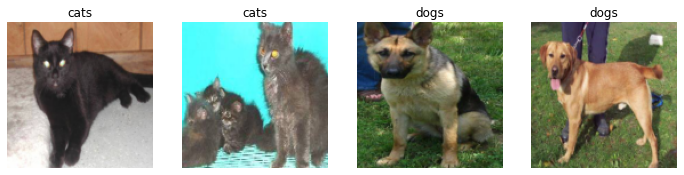

In [9]:
dataloader = datablock.dataloaders(path,batch_size=2)
dataloader.valid.show_batch(max_n=4, nrows=1)

In [10]:
model = cnn_learner(dataloader, resnet18, metrics= error_rate)
model.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.278644,0.603024,0.166667,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.995916,0.500935,0.333333,00:01
1,0.767299,0.393142,0.166667,00:01


In [11]:
matrix =  ClassificationInterpretation.from_learner(model)

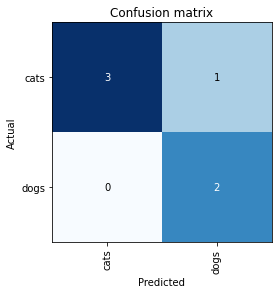

In [12]:
matrix.plot_confusion_matrix()

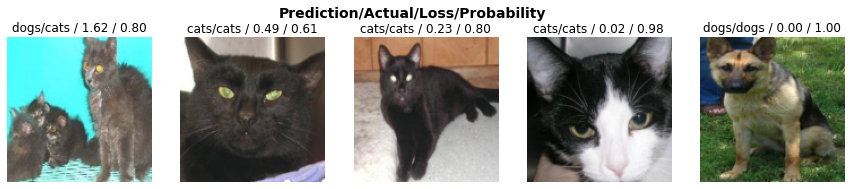

In [13]:
matrix.plot_top_losses(5, nrows=1)

#Turning our model into an online application


In [14]:
#save the model and the weigths ie the learned parameters as well as the dataloader as otherwise we would have to define the transformations again
model.export()

In [15]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [16]:
#loading our model 
load_model = load_learner(path/'export.pkl')

In [18]:
load_model.predict('index1.jpeg')

('cats', tensor(0), tensor([0.9983, 0.0017]))

## our GUI inside the notebook 


In [19]:
#upload button
upload_button = widgets.FileUpload()

In [20]:
#output the uploaded image 
output_placeholder = widgets.Output()

In [21]:
#fpredicting our the result
pred, pred_idx, prob = load_model.predict(image)

NameError: ignored

In [23]:
#formating our output
label_placeholder = widgets.Label()


In [24]:
#defining a button for processing the upload
run_btn = widgets.Button(description ='Classify')

In [25]:
def on_clicking(change):
  img = PILImage.create(upload_button.data[-1])
  output_placeholder.clear_output()
  with output_placeholder: display(img.to_thumb(128,128))
  pred, pred_idx, probs = load_model.predict(img)
  label_placeholder.value = f'Prediction: {pred}, Probabolity: {probs[pred_idx]:.04f}'

run_btn.on_click(on_clicking)

In [26]:
#making a vertical box for alll the buttons
VBox([widgets.Label('Select your input'),
      upload_button, run_btn, output_placeholder, label_placeholder])

The code above will allow us to run a test case in a more interactive way inside our notebook. But we can also use it in a webpage by using voila

In [27]:
!pip install voila